In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Load in csv
spotify_data_df = pd.read_csv("spotify_dataset.csv")
spotify_data_df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [2]:
spotify_2023 = spotify_data_df[spotify_data_df['year'] == 2023]
spotify_2023.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
584002,584002,Jason Mraz,I Feel Like Dancing,4xYlpJPENfM4DT0rUYFqSP,67,2023,acoustic,0.812,0.706,4,-6.054,0,0.0709,0.04120,0.000000,0.107,0.621,112.002,218702,4
584003,584003,Drew Holcomb & The Neighbors,Find Your People,6GuyIXoGIaTw1Pg6Ug9enJ,54,2023,acoustic,0.678,0.526,5,-7.292,1,0.0281,0.32900,0.000000,0.302,0.492,87.005,194093,4
584004,584004,Wilder Woods,Get It Back,29mhNauP6A7LSLqiMOWNlv,50,2023,acoustic,0.588,0.721,8,-5.691,1,0.0409,0.24600,0.000434,0.114,0.667,161.958,204787,4
584005,584005,Wilder Woods,Maestro (Tears Don't Lie),6N8hCmutQjQ3zZevRbJk36,49,2023,acoustic,0.604,0.937,7,-5.498,0,0.0452,0.00156,0.000122,0.266,0.726,120.010,202040,4
584006,584006,Ben Rector,Range Rover (A Capella),1X9XILnuFHH4G7mkXSNPsn,49,2023,acoustic,0.482,0.488,2,-8.144,1,0.1040,0.85700,0.000000,0.719,0.261,140.658,182826,4


In [3]:
# Group by 'genre' and calculate average popularity for 2023
genre_popularity_2023 = spotify_2023.groupby('genre')['popularity'].mean().reset_index()

# Sort genres by average popularity
genre_popularity_top10_2023 = genre_popularity_2023.sort_values(by='popularity', ascending=False).head(10)

# Display the top 5 genres by average popularity for 2023
genre_popularity_top10_2023

,genre,popularity
13,country,46.184028
43,house,42.967033
42,hip-hop,42.867876
45,indie-pop,40.913333
56,pop,40.764286
24,electro,39.445087
49,metal,39.246575
23,edm,37.861224
29,french,35.678105
9,chill,35.628922


In [4]:
#Top 3 artists for each of the top 10 genres

In [5]:
#Calculate average popularity by genre and get top 10 genres
genre_popularity_2023 = spotify_2023.groupby('genre')[['popularity','danceability','tempo']].mean().reset_index()
top_10_genres = genre_popularity_2023.sort_values(by='popularity', ascending=False).head(10)['genre']

#Filter data for top 10 genres
top_10_genres_data = spotify_2023[spotify_2023['genre'].isin(top_10_genres)]

# Group by genre and artist, calculate average popularity, danceability, and tempo
artist_popularity_top10_genres = top_10_genres_data.groupby(['genre', 'artist_name']).agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'tempo': 'mean'
}).reset_index()

# Sort by genre and popularity, and get top 3 artists for each genre
top_artists_by_genre = artist_popularity_top10_genres.sort_values(['genre', 'popularity'], ascending=[True, False])
top_3_artists_by_genre = top_artists_by_genre.groupby('genre').head(3)

# Display the top 3 artists for each of the top 10 genres
top_3_artists_by_genre

,genre,artist_name,popularity,danceability,tempo
218,chill,Prinz,75.000000,0.843000,142.086000
44,chill,CORBAL,71.000000,0.717000,80.275000
291,chill,Victoria Monét,71.000000,0.731000,76.964000
461,country,Zach Bryan,79.000000,0.447000,122.811000
426,country,Morgan Wallen,77.333333,0.541133,122.231333
419,country,Luke Combs,75.000000,0.512250,111.154250
514,edm,Lucas & Steve,68.000000,0.713000,125.055000
536,edm,Sigala,68.000000,0.683000,125.021500
474,edm,Chico Rose,66.000000,0.549000,121.152000
608,electro,Melanie Martinez,75.000000,0.392000,181.866000


In [6]:
# Top artists by tempo
top_artists_by_tempo = top_3_artists_by_genre.sort_values(by='tempo', ascending=False).head(10)
print("Top 10 Artists by Tempo:")
print(top_artists_by_tempo)

# Top artists by danceability
top_artists_by_danceability = top_3_artists_by_genre.sort_values(by='danceability', ascending=False).head(10)
print("Top 10 Artists by Danceability:")
print(top_artists_by_danceability)

Top 10 Artists by Tempo:
          genre         artist_name  popularity  danceability       tempo
608     electro    Melanie Martinez   75.000000      0.392000  181.866000
1199      metal  Falling In Reverse   80.000000      0.395000  161.946000
1242      metal                 SiM   74.000000      0.272000  159.893000
1082  indie-pop             Lovejoy   75.000000      0.517000  152.007000
218       chill               Prinz   75.000000      0.843000  142.086000
985       house          Anne-Marie   64.000000      0.705000  140.076000
635     electro         Young Marco   69.000000      0.693000  136.020000
700      french             GAULOIS   74.000000      0.717000  134.067000
1291        pop         Miley Cyrus   80.272727      0.587909  130.596636
1100  indie-pop            Måneskin   68.923077      0.539615  130.363769
Top 10 Artists by Danceability:
        genre      artist_name  popularity  danceability     tempo
1303      pop             TINI        84.0        0.9130  119.

In [7]:
# Create a summary table for each artist
artist_summary = top_3_artists_by_genre.groupby('artist_name').agg({
    'popularity': 'mean',
    'tempo': 'mean',
    'danceability': 'mean',
}).reset_index()

# Sort by average popularity
artist_summary = artist_summary.sort_values(by='popularity', ascending=False)

# Display the summary table
artist_summary.head(30)

,artist_name,popularity,tempo,danceability
1,Bizarrap,96.000000,122.104000,0.778000
8,Linkin Park,84.000000,105.010000,0.596000
24,TINI,84.000000,119.873000,0.913000
29,beabadoobee,82.000000,113.946000,0.620000
15,Miley Cyrus,80.272727,130.596636,0.587909
5,Falling In Reverse,80.000000,161.946000,0.395000
3,Cartel De Santa,80.000000,87.974500,0.869500
21,SZA,80.000000,99.941000,0.678000
19,NF,80.000000,90.421000,0.615500
28,Zach Bryan,79.000000,122.811000,0.447000


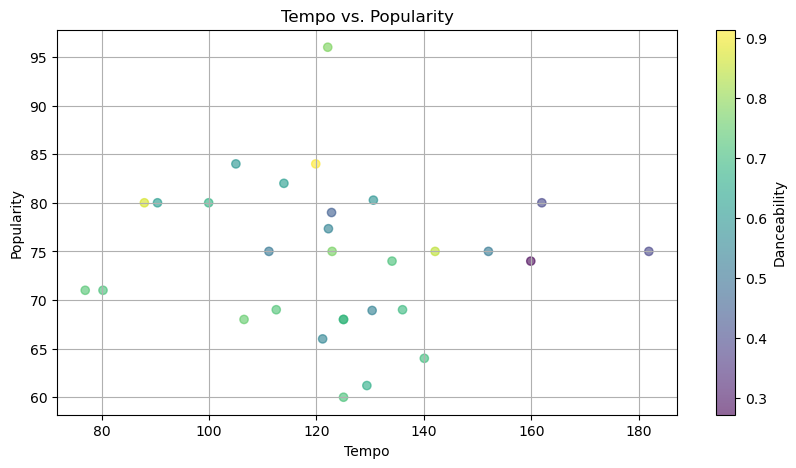

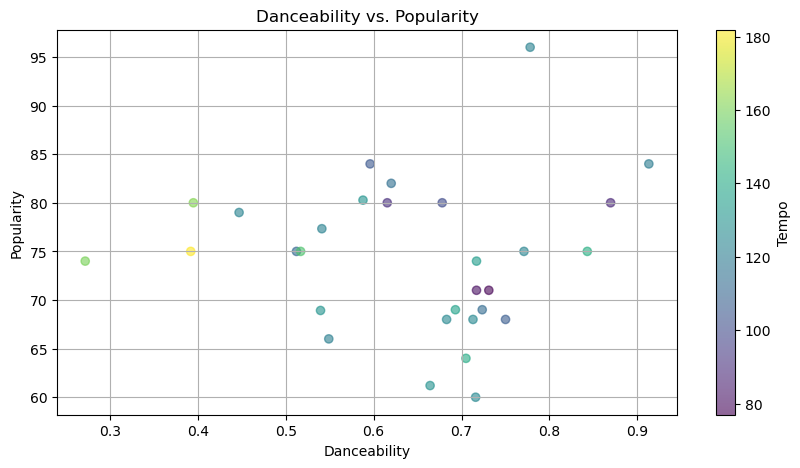

In [8]:
# Scatter plot for tempo vs. popularity
plt.figure(figsize=(10, 5))
plt.scatter(artist_summary['tempo'], artist_summary['popularity'], c=artist_summary['danceability'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Danceability')
plt.title('Tempo vs. Popularity')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Scatter plot for danceability vs. popularity
plt.figure(figsize=(10, 5))
plt.scatter(artist_summary['danceability'], artist_summary['popularity'], c=artist_summary['tempo'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Tempo')
plt.title('Danceability vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()